# astropy tutorial
`http://learn.astropy.org/FITS-images.html`

In [1]:
import numpy as np

# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
# matplotlib.rc_file("../../templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline

# to download example fits from astropy tutorial
from astropy.utils.data import download_file

In [2]:
# Viewing & Manipulating FITS images
from astropy.io import fits
image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

# Opening FITS files and loading the image data

I will open the FITS file and find out what it contains.

In [3]:
hdu_list = fits.open(image_file)
hdu_list.info()

Filename: /Users/aprado/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


<!-- # Generally the image information is located in the PRIMARY block.  -->

Generally the image information is located in the PRIMARY block. 

In [4]:
# The blocks are numbered and can be accessed by indexing hdu_list.
image_data = hdu_list[0].data

You data is now stored as a 2-D numpy array. Want to know the dimensions of the image? Just look at the shape of the array.

In [5]:
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


At this point, we can just close the FITS file. We have stored everything we wanted to a variable.

In [6]:
hdu_list.close()

# Shortcut

If you don't need to examine the FITS header, you can call fits.getdata to bypass the previous steps.

In [7]:
image_data = fits.getdata(image_file)
print(type(image_data))
print(image_data.shape)

<class 'numpy.ndarray'>
(893, 891)


# Viewing the image data and getting basic statistics¶

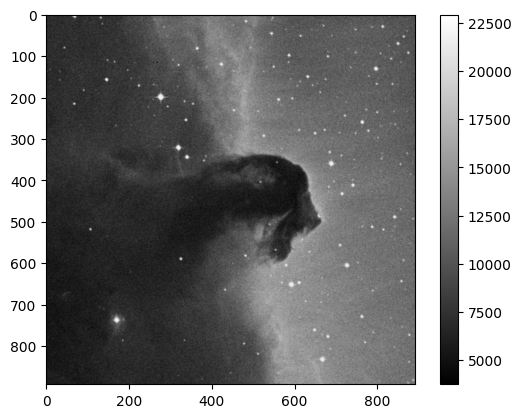

In [8]:
plt.imshow(image_data, cmap='gray')
plt.colorbar()

Let's get some basic statistics about our image

In [9]:
print('Min:', np.min(image_data))
print('Max:', np.max(image_data))
print('Mean:', np.mean(image_data))
print('Stdev:', np.std(image_data))

Min: 3759
Max: 22918
Mean: 9831.481676287574
Stdev: 3032.3927542049046


# To see more color maps
`http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps`

# Plotting a Histogram
To make a histogram with matplotlib.pyplot.hist(), I need to cast the data from a 2-D to array to something one dimensional.

In this case, I am using the *ndarray.flatten()* to return a 1-D numpy array.

In [10]:
print(type(image_data.flatten()))

<class 'numpy.ndarray'>


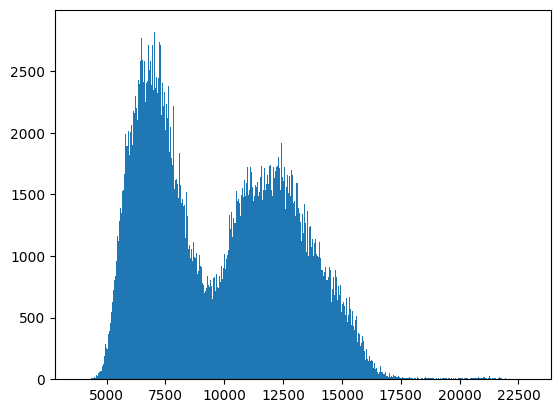

In [11]:
NBINS = 1000
histogram = plt.hist(image_data.flatten(), NBINS)

# Displaying the image with a logarithmic scale
Want to use a logarithmic color scale? To do so we need to load the LogNorm object from matplotlib.

In [12]:
from matplotlib.colors import LogNorm

[Text(1, 5000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

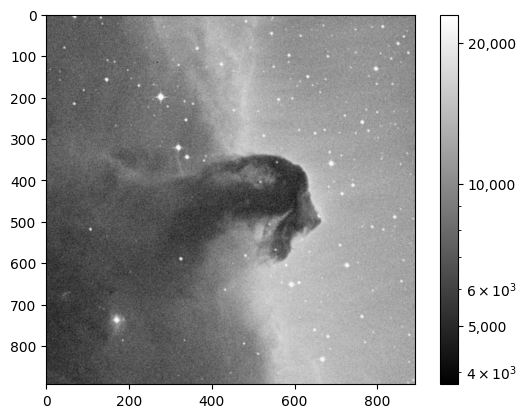

In [13]:
plt.imshow(image_data, cmap='gray', norm=LogNorm())

# I chose the tick marks based on the histogram above
cbar = plt.colorbar(ticks=[5.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

# Basic image math: image stacking
*You can perform math with the image data* like any other numpy array. In this particular example, I will stack several images of M13 taken with a ~10'' telescope.

I open a series of FITS files and store the data in a list, which I've named image_concat.

In [14]:
image_list = [ download_file('http://data.astropy.org/tutorials/FITS-images/M13_blue_000'+n+'.fits', cache=True ) \
              for n in ['1','2','3','4','5'] ]

# The long way
# image_concat = []
# for image in image_list:
#     image_concat.append(fits.getdata(image))
    
# The short way
image_concat = [fits.getdata(image) for image in image_list]

Now I'll stack the images by summing my concatenated list.

In [15]:
# The long way
# final_image = np.zeros(shape=image_concat[0].shape)

# for image in image_concat:
#     final_image += image

# The short way
final_image = np.sum(image_concat, axis=0)

I'm going to show the image, but I want to decide on the best stretch. To do so I'll plot a histogram of the data.

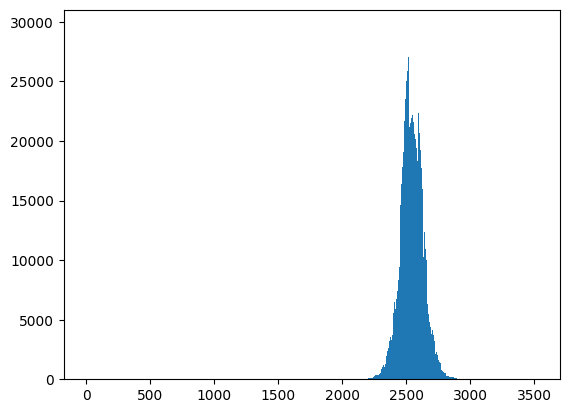

In [16]:
image_hist = plt.hist(final_image.flatten(), 1000)

I'll use the keywords vmin and vmax to set limits on the color scaling for imshow.

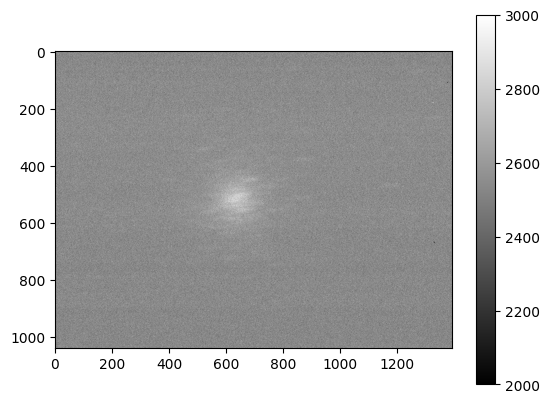

In [17]:
plt.imshow(final_image, cmap='gray', vmin=2.e3, vmax=3.e3)
plt.colorbar()

# Writing image data to a FITS file¶
This is easy to do with the *writeto()* method.

You will receive an error if the file you are trying to write already exists. That's why I've set clobber=True. (overwrite=True)

In [18]:
outfile = 'stacked_M13_blue.fits'

hdu = fits.PrimaryHDU(final_image)
hdu.writeto(outfile, overwrite=True)

# Exercises

Determine the mean, median, and standard deviation of a part of the stacked M13 image where there is not light from M13. Use those statistics with a sum over the part of the image that includes M13 to estimate the total light in this image from M13.